# 필요한 패키지 import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Pandas Option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

# matplotlib 기본 글꼴 관련 설정
plt.rc( 'font', size=14 )
plt.rc( 'axes', labelsize=14, titlesize=14 )
plt.rc( 'legend', fontsize=14 )
plt.rc( 'xtick', labelsize=10 )
plt.rc( 'ytick', labelsize=10 )

In [5]:
# matplotlib 한글 출력을 위한 설정
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [6]:
# 경고 문자 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [7]:
# Tensorflow import 및 버전 확인
import tensorflow as tf

tf.__version__

2024-09-10 02:26:02.835363: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 02:26:02.842673: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 02:26:02.862432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 02:26:02.893933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 02:26:02.903278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 02:26:02.925844: I tensorflow/core/platform/cpu_feature_gu

'2.17.0'

In [8]:
# Tensorflow 필요한 클래스/함수 import
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

# Scikit-learn 데이터 분리 함수 import
from sklearn.model_selection import train_test_split

# 선형 회귀( Linear Regression )

## 0. 데이터 준비

In [9]:
# 입력 데이터
X = np.array( [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ] )

# Label
y = np.array( [ 11, 22, 33, 44, 53, 66, 77, 87, 95 ] )

In [10]:
print( f'X.shape : {X.shape}' )
print( f'y.shape : {y.shape}' )

X.shape : (9,)
y.shape : (9,)


## 1. 데이터 분석

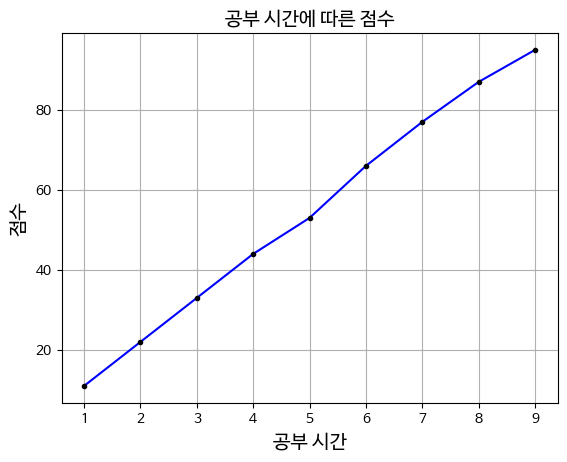

In [11]:
plt.plot( X, y, 'b', X, y, 'k.' )

plt.title( '공부 시간에 따른 점수' )
plt.xlabel( '공부 시간' )
plt.ylabel( '점수' )
plt.grid()

plt.show()

## 2. 모델링( Modeling ) - 학습 모델 생성 단계

In [18]:
model = Sequential() # Sequential 객체 생성
model.add( Dense( 1, input_dim = 1, activation = 'linear', name = 'output' ) ) # layer 추가
# Dense 객체 - 신경망 layer
#   첫번째 인수 : 뉴런( Nuron )
#   input_dim=1 : 입력 차원( 입력데이터 수 )
#   activation='linear' : 활성화 함수 -> 출력 layer에서는 가설식에 해당하는 함수
#               linear-선형회귀, sigmoid-이진분류, softmax-다중클래스분류
#   name='output' : layer 이름( 선택 사항 )

#model = Sequential( [ Dense( 1, input_dim = 1, activation = 'linear', name = 'output' ) ] )

In [19]:
model.summary() # 모델 구조 출력

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일( compile ) 

In [20]:
sgd = optimizers.SGD() # optimizer 객체 생성, SGD-확률적 경사 하강법

# compile() 메서드, Sequential 객체에서 제공하는 메서드( 함수 )
#    loss='mean_sequared_error' : 비용함수, 딥러닝에서는 손실 함수, 필수 인수
#    optimizer=sgd : optimizer, 필수 인수
#    metrics=['mse', 'accuracy'] : 훈련시 출력할 항목 지정( 훈련 모니터링 지표 ), loss는 기본 출력
#        accuracy : 분류모델에서 주로 사용
model.compile( loss = 'mean_squared_error',
               optimizer = sgd,
               metrics = [ 'mse', 'accuracy' ] )

## 4. 훈련

In [21]:
# fit() 메서드 : 모델 훈련 
#   X : 훈련 입력 데이터 집합
#   y : 훈련 Label 집합
#   epochs=20 : 훈련 횟수
#   batch_size=1 : 매개 변수를 변경하는 단위, 1은 1개 단위로 매개 변수 변경
history = model.fit( X, y, epochs = 20,
                     batch_size = 1 )

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 1226.0972 - mse: 1226.0972
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5072 - mse: 1.5072 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.0417 - mse: 3.0417 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5682 - mse: 3.5682         
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2.6306 - mse: 2.6306 
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 5.6253 - mse: 5.6253 
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 4.3383 - mse: 4.3383 
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.8051 - mse: 3.8051 
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1.2437 - mse: 1.2437 
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss

### 훈련 과정 확인

In [22]:
type( history )

keras.src.callbacks.history.History

In [23]:
history

In [24]:
type( history.history )

dict

In [25]:
print( history.history[ 'loss' ] )

[696.30908203125, 3.225633144378662, 3.2185299396514893, 4.245152473449707, 2.933816432952881, 3.6315956115722656, 3.168635606765747, 3.206313133239746, 1.2371236085891724, 1.5774691104888916, 2.0353848934173584, 3.5057365894317627, 1.6275010108947754, 1.6133716106414795, 2.4122862815856934, 4.739224910736084, 1.5913289785385132, 2.163133144378662, 4.568593978881836, 3.776778221130371]


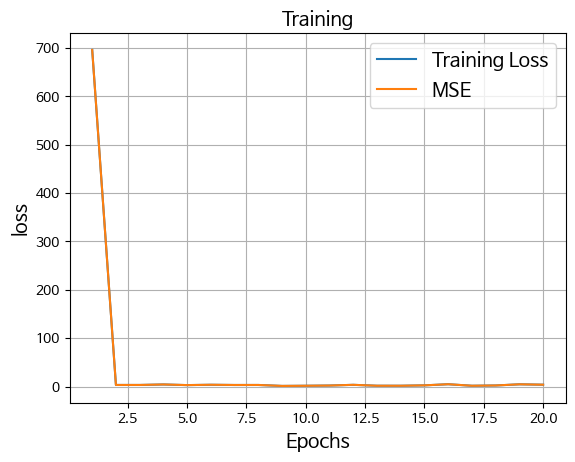

In [26]:
loss = history.history[ 'loss' ]
mse = history.history[ 'mse' ]
epochs = range( 1, len( loss ) + 1 )

plt.plot( epochs, loss, label = 'Training Loss' )
plt.plot( epochs, mse, label = 'MSE' )
plt.title( 'Training' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'loss' )
plt.legend()
plt.grid()

plt.show()

## 5. 평가

In [27]:
# evaluate() 메서드 : 훈련이 끝난 모델에 대하여 성능 평가
#   X : 평가용 입력데이터
#   y : 평가요 Label
#   batch_size=1 : 평가 batch_size
model.evaluate( X, y, batch_size = 1 )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1.3684 - mse: 1.3684  


[2.335482120513916, 2.335482120513916, 0.0]

## 6. 예측

In [28]:
# predict() 메서드 : 생성된 AI 모델을 활용하여 예측( 추론 ) 수행
#   인수 : 모델 훈련시 입력데이터 수와 자료형에 맞추어 전달되는 추론시 사용하는 값
model.predict( np.array( [ 9 ] ) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[98.51552]], dtype=float32)

In [29]:
model.predict( np.array( [ 10 ] ) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[109.31697]], dtype=float32)

In [30]:
model.predict( X )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[12.10386 ],
       [22.905317],
       [33.706776],
       [44.508232],
       [55.30969 ],
       [66.111145],
       [76.9126  ],
       [87.71406 ],
       [98.51552 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


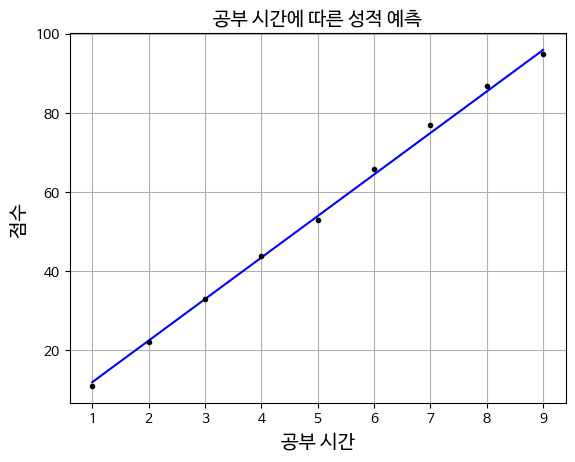

In [56]:
plt.plot( X, model.predict( X ), 'b', X, y, 'k.' )
plt.title( '공부 시간에 따른 성적 예측' )
plt.xlabel( '공부 시간' )
plt.ylabel( '점수 ' )
plt.grid()

plt.show()